# Mini-Golf 2023 score analyses
## Raw data

In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv('Championnat-2023.csv',sep=';',header=0)
df

,Nom,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,Total
0,Yannick,10,4,-1,5,-1,12,7,8,12,7,15,63
1,LaurentM,7,9,8,8,9,7,9,3,0,0,9,48
2,Jody,10,10,11,9,7,9,5,8,11,0,13,61
3,David,3,1,5,11,5,11,1,-3,9,0,14,43
4,Jacques,5,7,4,3,5,2,7,10,0,0,12,43
5,Serge,10,4,6,7,6,9,11,4,2,0,11,42
6,Bruno,3,6,3,4,9,2,8,7,4,0,11,46
7,Thao,8,10,1,8,0,0,0,0,0,0,13,26
8,M-C,4,-1,5,7,4,1,9,-3,9,0,13,26
9,Manu,-2,0,0,8,8,4,5,5,0,0,13,28


## Summary data

In [104]:
import numpy as np
import pandas as pd

df = pd.read_csv('Championnat-2023.csv',sep=';',header=0)

# select score data
df_t = df.T
df_t = df_t.iloc[1:11,:]

# calculate score sum
df_sum = df_t.sum()
df_sum = pd.DataFrame(df_sum)
df_sum.index = df['Nom']
df_sum.columns = ['sum']

# transform data to real scores
np_array = 46 - np.array(df_t)
np_array = np_array.astype('int')
df_t_corrected = pd.DataFrame(np_array)
df_t_corrected.columns = df['Nom']

# calculate summary information
df_t_desc = df_t_corrected.describe()
df_t_desc = df_t_desc.T
df_t_desc['sum'] = df_sum

df_t_desc = df_t_desc.sort_values(['sum','min'], ascending=[False,True])
df_t_desc['position'] = [i+1 for i,v in enumerate(df['Nom'])]

print(df_t_desc)

          count  mean       std   min    25%   50%    75%   max sum  position
Nom                                                                          
Jody       10.0  38.0  3.366502  35.0  36.00  37.0  38.75  46.0  80         1
Yannick    10.0  39.7  4.667857  34.0  36.50  39.0  41.75  47.0  63         2
LaurentM   10.0  40.0  3.620927  37.0  37.25  38.5  42.00  46.0  60         3
Serge      10.0  40.1  3.510302  35.0  37.50  40.0  42.00  46.0  59         4
Bruno      10.0  41.4  2.836273  37.0  39.25  42.0  43.00  46.0  46         5
David      10.0  41.7  4.808557  35.0  38.00  42.0  45.00  49.0  43         6
Jacques    10.0  41.7  3.198958  36.0  39.50  41.5  43.75  46.0  43         7
Pascal     10.0  42.1  3.984693  35.0  40.00  41.0  46.00  47.0  39         8
M-C        10.0  42.5  4.169999  37.0  39.50  42.0  45.75  49.0  35         9
Manu       10.0  43.2  3.645393  38.0  41.00  44.0  46.00  48.0  28        10
Jay        10.0  43.2  2.898275  39.0  40.25  44.0  46.00  46.0 

## Boxplot

[]

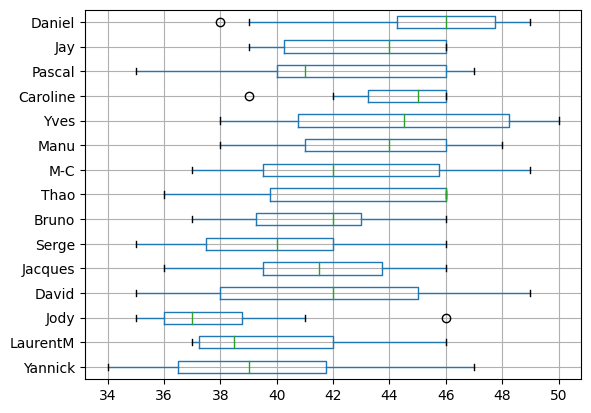

In [3]:
# Creating plot
import pandas as pd
import numpy as np

df = pd.read_csv('Championnat-2023.csv', sep=';', header=0)

df_modifie = pd.DataFrame(46 - np.array(df.iloc[:,1:11]))
df_modifie = df_modifie.T
df_modifie.columns = df['Nom']

b_plot = df_modifie.boxplot(fontsize = 10, vert=False) 
b_plot.plot()

## Graphics

In [109]:
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np

df_long = pd.melt(df, id_vars =['Nom'], value_vars =df.loc[:,'C1':'C10'],var_name='C', value_name='score')
df_long['score'] = 46 - df_long['score']

df_total = df_total[df_total['score'] != 46]
fig2 = ff.create_distplot([df_total['score']], ['total'])
fig2.update_xaxes(nticks=18,dtick=1)
fig2.update_yaxes(dtick=1)
fig2.show()


fig3 = px.box(df_long.query('score != 46'), x="Nom", y="score", notched=True)
fig3.show()

fig4 = px.strip(df_long.query('score != 46'), x="Nom", y="score")
fig4.show()


## Probability simulation

In [5]:
import numpy as np
import pandas as pd

def simulation(k,n):
    
    simulate = []
    
    freq = np.zeros((len(df_means), len(df_means)))  # Initialize freq as a numpy array

    for index, row in df_means.iterrows():
        R = np.random.normal(row["mean"], row["std"], (k,n))
        #R = np.round(R)
        simulate.append(R)
    #print(simulate)  

    for i in range(len(df_means)):
        for j in range(len(df_means)):
            results = (simulate[i] < simulate[j])
            freq[i,j] = round((np.count_nonzero(results))/(k*n)*100,2)
    
    return freq

simulation_matrix = np.zeros((len(df_means),len(df_means)))
rep = 10000
for s in range(rep):
    simulation_matrix = simulation_matrix + simulation(1,1)
    simulation_matrix_mean = simulation_matrix / rep
    
simulation_final = np.round(simulation_matrix_mean)
#print(simulation_final) 
    
df_results = pd.DataFrame(simulation_final, columns = df_means['joueur'], index = df_means['joueur'] )
print(df_results)
#df_results.to_csv('results.csv', encoding='utf-8')

joueur    Jody  Yannick  David  Serge  ...  Manu  Jacques  Caroline  Daniel
joueur                                 ...                                 
Jody       0.0     64.0   73.0   72.0  ...  75.0     79.0      94.0    93.0
Yannick   36.0      0.0   59.0   52.0  ...  58.0     58.0      72.0    79.0
David     27.0     41.0    0.0   42.0  ...  49.0     47.0      60.0    71.0
Serge     28.0     48.0   58.0    0.0  ...  58.0     57.0      77.0    83.0
LaurentM  29.0     53.0   63.0   57.0  ...  64.0     65.0      88.0    88.0
Thao      41.0     55.0   64.0   58.0  ...  64.0     64.0      79.0    84.0
Yves      14.0     28.0   36.0   26.0  ...  35.0     31.0      43.0    57.0
M-C       20.0     36.0   45.0   35.0  ...  44.0     40.0      55.0    67.0
Jay       12.0     36.0   48.0   34.0  ...  46.0     42.0      63.0    74.0
Bruno     17.0     39.0   50.0   39.0  ...  49.0     46.0      66.0    76.0
Pascal    25.0     44.0   53.0   44.0  ...  53.0     51.0      69.0    78.0
Manu      25